In [3]:
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from itertools import combinations

# Define the root directory where the data folders are located
root_dir = '/Users/darth/stuProj.backup/distances_2_attempt'

# List to store the file paths of train distance files
train_file_paths = []

# Traverse the directory structure to find train distance files
for subdir, _, files in os.walk(root_dir):
    for file in files:
        if 'train' in file and file.endswith('_distances.csv'):
            train_file_paths.append(os.path.join(subdir, file))

# Load each train distance file into a DataFrame, keeping only numeric columns
dataframes = []
for file in train_file_paths:
    df = pd.read_csv(file)
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    # Flatten the DataFrame and store it
    dataframes.append(df_numeric)

# Function to calculate the Euclidean distance between two data distributions
def calculate_distribution_distance(df1, df2):
    # Flatten the dataframes and calculate the Euclidean distance
    flattened1 = df1.values.flatten()
    flattened2 = df2.values.flatten()
    # Ensure both arrays are the same length by padding the shorter one if necessary
    length = min(len(flattened1), len(flattened2))
    return euclidean(flattened1[:length], flattened2[:length])

# Initialize variables to store the minimum distance and corresponding file names
min_distance = float('inf')
closest_pair = None

# Calculate the Euclidean distance for each pair of train distance files
for (i, df1), (j, df2) in combinations(enumerate(dataframes), 2):
    distance = calculate_distribution_distance(df1, df2)
    if distance < min_distance:
        min_distance = distance
        closest_pair = (train_file_paths[i], train_file_paths[j])
        

# Output the result
print(f"The two files with the most similar distributions are: {closest_pair[0]} and {closest_pair[1]}")
print(f"The Euclidean distance between them is: {min_distance}")


The two files with the most similar distributions are: /Users/darth/stuProj.backup/distances_2_attempt/hai-21.03/hai_2103_train2_distances.csv and /Users/darth/stuProj.backup/distances_2_attempt/hai-22.04/hai_2204_train4_distances.csv
The Euclidean distance between them is: 49.26230052520716


The two files with the most similar distributions are: /Users/darth/stuProj.backup/distances_2_attempt/hai-21.03/hai_2103_train2_distances.csv and /Users/darth/stuProj.backup/distances_2_attempt/hai-22.04/hai_2204_train4_distances.csv
The Euclidean distance between them is: 49.26230052520716


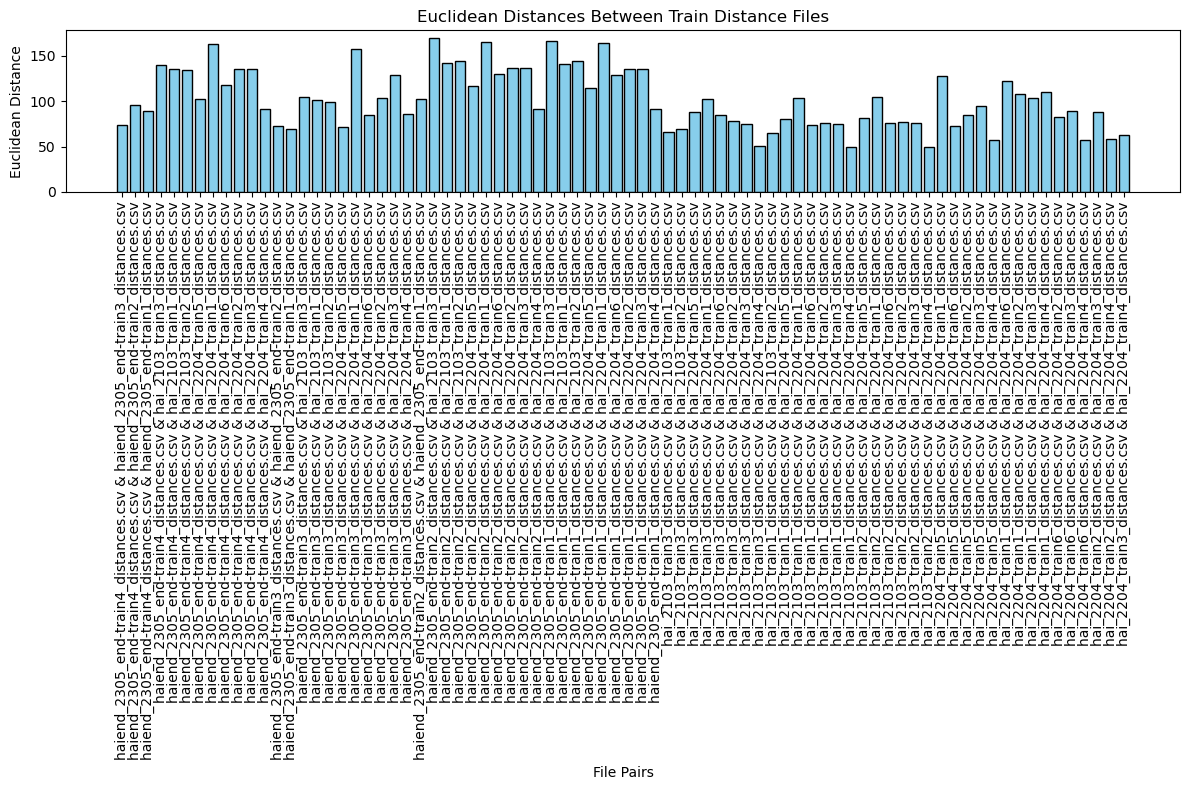

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ... existing code ...

# List to store all calculated distances and their corresponding file pairs
all_distances = []
file_pairs = []

# Calculate the Euclidean distance for each pair of train distance files
for (i, df1), (j, df2) in combinations(enumerate(dataframes), 2):
    distance = calculate_distribution_distance(df1, df2)
    all_distances.append(distance)  # Store each distance
    file_pairs.append((train_file_paths[i], train_file_paths[j]))  # Store the file pair
    if distance < min_distance:
        min_distance = distance
        closest_pair = (train_file_paths[i], train_file_paths[j])

# Output the result
print(f"The two files with the most similar distributions are: {closest_pair[0]} and {closest_pair[1]}")
print(f"The Euclidean distance between them is: {min_distance}")

# Plot a bar chart of all distances with file pair labels
plt.figure(figsize=(12, 8))
x_pos = np.arange(len(all_distances))
plt.bar(x_pos, all_distances, color='skyblue', edgecolor='black')
plt.xticks(x_pos, [f"{os.path.basename(pair[0])} & {os.path.basename(pair[1])}" for pair in file_pairs], rotation=90)
plt.title('Euclidean Distances Between Train Distance Files')
plt.xlabel('File Pairs')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()